## Support Vector Machines
* Hyperplanes and Margins
    * In an N-dimensional space, a hyperplane is a flat affine subspace of hyperplane dimension N-1.
    For Example:
        * 1-D Hyperplane is a single point
        * 2-D Hyperplane is a line
        * 3-D Hyperplane is flat plane

* The main idea behind SVM is that we can use Hyperplanes to create a seperation betwwen classes.
* Then new points will fall on one side of this seperating hyperplane,which we can then use to assign a class.

* This same idea of maximum margins applies to N-dimensions.
* Soft margin allows for misclassification inside the margins.

* SVMs use **kernels** to project the data to a higher dimension,in order to use a hyperplane in this higher dimension to separaae the data.


## Kernel Intuition
* Kernels allow us to move beyond a Support Vector Classifier and use Support Vector Machines.

* There are a variety of kernles we can use to "project" the features to a higher dimension.

## Kernel Trick and Mathematics
How to deal with very large feature space?
The answer lies in the **kernel trick** which makes use of the inner product of vectors,also known as the **dot product**.

* Kernels allow us to avoid computations is the enlarged feature space,by only needing to perform computations for each distinct pair of training points.



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("./mouse_viral_study.csv")

In [4]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


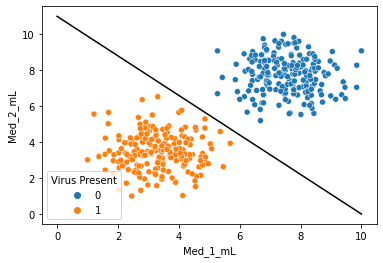

In [5]:
sns.scatterplot(x="Med_1_mL",y="Med_2_mL",hue="Virus Present",data=df)

#HYPERPLANE (2d line)

x=np.linspace(0,10,100)
m=-1.1
b=11
y=m*x +b

plt.plot(x,y,"black")

In [6]:
from sklearn.svm import SVC

In [7]:
y = df["Virus Present"]

In [8]:
X=df.drop("Virus Present",axis=1)

In [9]:
model= SVC(kernel="linear",C=1000)

In [10]:
model.fit(X,y)

SVC(C=1000, kernel='linear')

In [11]:
from svm_margin_plot import plot_svm_boundary

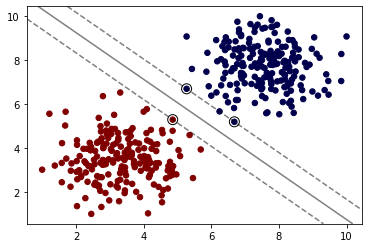

In [12]:
plot_svm_boundary(model,X,y)

In [15]:
model=SVC(kernel="linear",C=0.005)
model.fit(X,y)

SVC(C=0.005, kernel='linear')

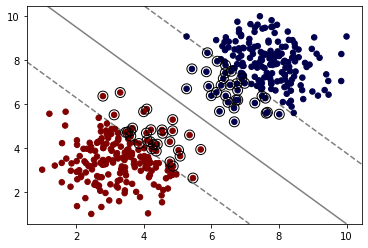

In [16]:
plot_svm_boundary(model,X,y)

In [17]:
model=SVC(kernel="rbf",C=1)
model.fit(X,y)

SVC(C=1)

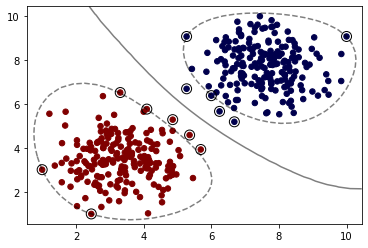

In [18]:
plot_svm_boundary(model,X,y)

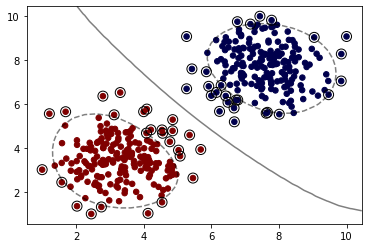

In [20]:
model=SVC(kernel="rbf",C=0.1)
model.fit(X,y)
plot_svm_boundary(model,X,y)

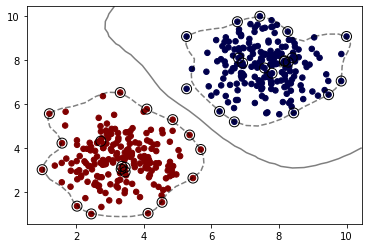

In [21]:
model=SVC(kernel="rbf",C=1,gamma="auto")
model.fit(X,y)
plot_svm_boundary(model,X,y)

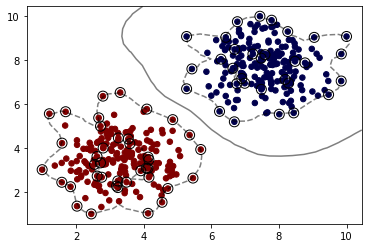

In [22]:
model=SVC(kernel="rbf",C=1,gamma=0.9)
model.fit(X,y)
plot_svm_boundary(model,X,y)

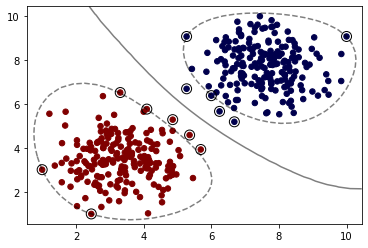

In [24]:
model=SVC(kernel="rbf",C=1,gamma="scale")
model.fit(X,y)
plot_svm_boundary(model,X,y)

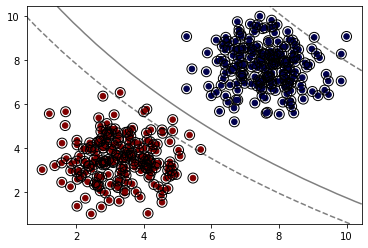

In [26]:
model=SVC(kernel="sigmoid")
model.fit(X,y)
plot_svm_boundary(model,X,y)

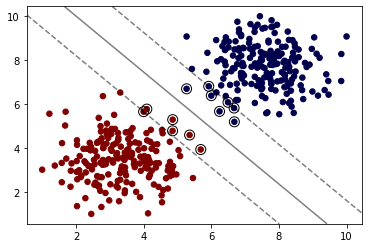

In [27]:
model=SVC(kernel="poly",C=1,degree=1)
model.fit(X,y)
plot_svm_boundary(model,X,y)

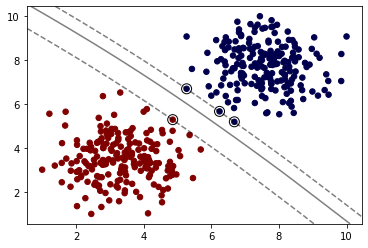

In [30]:
model=SVC(kernel="poly",C=0.05,degree=8)
model.fit(X,y)
plot_svm_boundary(model,X,y)

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
svm=SVC()
param_grid={"C":[0.01,0.1,1],"kernel":["linear","rbf"]}

In [33]:
grid=GridSearchCV(svm,param_grid)

In [34]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [35]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

### Support Vector Regression

In [36]:
df=pd.read_csv("cement_slump.csv")

In [37]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


<AxesSubplot:>

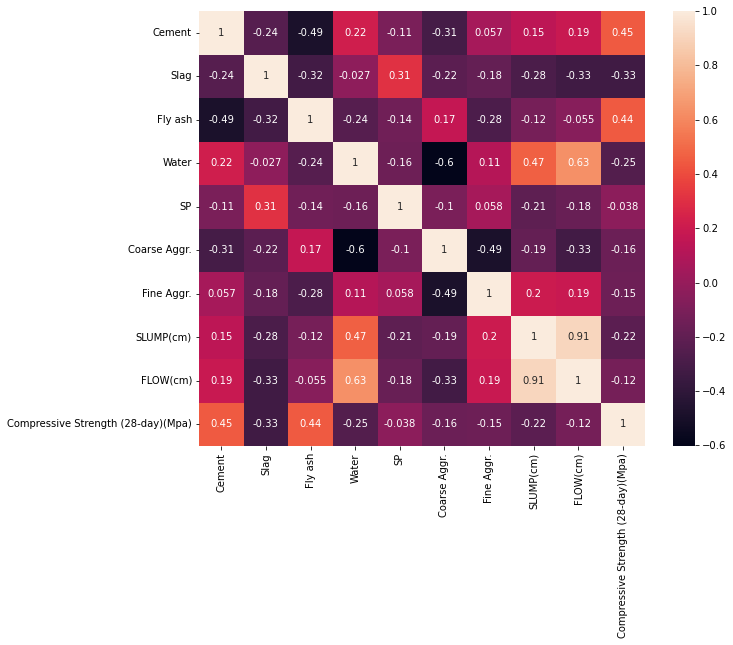

In [40]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [41]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [42]:
X=df.drop("Compressive Strength (28-day)(Mpa)",axis=1)

In [43]:
y=df["Compressive Strength (28-day)(Mpa)"]

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler=StandardScaler()

In [48]:
scaled_X_train=scaler.fit_transform(X_train)

In [49]:
scaled_X_test=scaler.transform(X_test)

In [50]:
from sklearn.svm import SVR,LinearSVR

In [51]:
base_model=SVR()

In [52]:
base_model.fit(scaled_X_train,y_train)

SVR()

In [53]:
base_pred=base_model.predict(scaled_X_test)

In [54]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [55]:
mean_absolute_error(y_test,base_pred)

5.236902091259179

In [56]:
np.sqrt(mean_squared_error(y_test,base_pred))

6.695914838327134

In [57]:
y_test.mean()

36.26870967741935

In [64]:
param_grid={"C":[0.001,0.01,0.1,0.5,1],
            "kernel":["linear","rbf","poly"],
            "gamma":["scale","auto"],
            "degree":[2,3,4],
            "epsilon":[0,0.01,0.1,0.5,1,2]}

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
svr=SVR()

In [67]:
grid=GridSearchCV(svr,param_grid)

In [68]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [69]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [70]:
grid_pred=grid.predict(scaled_X_test)

In [71]:
mean_absolute_error(y_test,grid_pred)

2.5128012210761708

In [72]:
np.sqrt(mean_squared_error(y_test,grid_pred))

3.1782103051198094